# Imports 

In [1]:
import os
import random 
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
image_directory = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'xrays')
annotation_file = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'train_quadrant_enumeration_disease.json')

In [33]:
def get_random_image_file(image_directory= image_directory):
    '''
    purpose: gets a random image file from the quadrant-enumeration-disease folder. 
    '''
    files = os.listdir(image_directory)
    file_name = random.choice(files)
    file_path = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'xrays', file_name)
    return file_path

def display_image(image_dir):
    '''
    purpose: given an image directory, display the image.
    '''
    image = cv2.imread(image_dir)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def get_image_bbox(image_dir, annotation_file= annotation_file):
    '''
    purpose: given an image dir, retrieve all the bounding boxes for the image. 
    '''
    # 1. get the file name 
    filename = image_dir.split('/')[-1]
    
    # 2. get the image id from annotations file 
    with open(annotation_file, 'r') as f:
        ann_json = json.load(f)

    all_imgs = ann_json['images']
    for img in all_imgs:
        if img['file_name'] == filename:
            img_id = img['id']
            break 

    # 3. using the image id, get all the bbox labels in the annotations for the image 
    annotations = ann_json['annotations']
    bboxes = []
    for ann in annotations:
        if ann['image_id'] == img_id:
            bboxes.append(ann['bbox'])
    
    return bboxes

def plot_image_with_boxes(image_dir, bboxes):
    '''
    purpose: plots an image with the bounding boxes.
    '''
    # Read the image
    image = cv2.imread(image_dir)
    
    # Plot bounding boxes
    for bbox in bboxes:
        x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)  # Draw rectangle

    plt.imshow(image)
    plt.axis('off')
    
def get_seg_masks(image_dir):
    '''
    purpose: get the segmentation annotations for the image provided. 
    '''
    # 1. get the file name 
    filename = image_dir.split('/')[-1]
    
    # 2. get the image id from annotations file 
    with open(annotation_file, 'r') as f:
        ann_json = json.load(f)

    all_imgs = ann_json['images']
    for img in all_imgs:
        if img['file_name'] == filename:
            img_id = img['id']
            break 
    
    # 3. using the image id, get all the bbox labels in the annotations for the image 
    annotations = ann_json['annotations']
    seg_masks = []
    for ann in annotations:
        if ann['image_id'] == img_id:
            for s in ann['segmentation']:
                seg_masks.append(s)
    
    return seg_masks

def plot_image_with_seg(image_dir, image_segmentation):
    image = cv2.imread(image_dir)
    # Convert image to RGB (OpenCV reads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Iterate over each segmentation annotation
    for segmentation_annotation in image_segmentation:
        # Convert segmentation annotation to numpy array with dtype=int32
        pts = np.array(segmentation_annotation, np.int32)
        pts = pts.reshape((-1, 1, 2))

        # Create mask from segmentation annotation
        mask = np.zeros_like(image)
        cv2.fillPoly(mask, [pts], (255, 255, 255))

        # Find contours in the mask
        contours, _ = cv2.findContours(mask[:,:,0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the image
        cv2.drawContours(image_rgb, contours, -1, (255, 0, 0), 5)

        # Display the image with segmentations overlaid
        plt.imshow(image_rgb)
        plt.axis('off')  # Turn off axis
        plt.show()

In [4]:
image_dir = get_random_image_file()
image_dir

'../../data/training_data/quadrant-enumeration-disease/xrays/train_265.png'

# view a panoramic x-ray without any labelling 

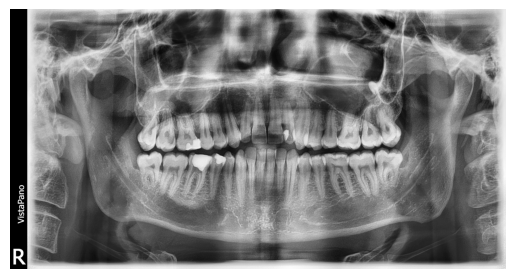

In [5]:
display_image(image_dir= image_dir)

# view a panoramic xray with bounding boxes 

In [6]:
bboxes = get_image_bbox(image_dir= image_dir)

In [7]:
bboxes

[[688.0, 813.0, 203.0, 232.0],
 [984.0, 821.0, 202.0, 291.0],
 [1720.0, 820.0, 126.0, 300.0],
 [1790.0, 815.0, 226.0, 293.0],
 [1938.0, 795.0, 210.0, 308.0],
 [2094.0, 794.0, 235.0, 251.0],
 [2103.0, 545.0, 180.0, 269.0],
 [1880.0, 532.0, 178.0, 308.0],
 [1763.0, 442.0, 220.0, 380.0],
 [827.0, 544.0, 147.0, 296.0],
 [1071.0, 527.0, 126.0, 304.0],
 [934.0, 552.0, 181.0, 284.0]]

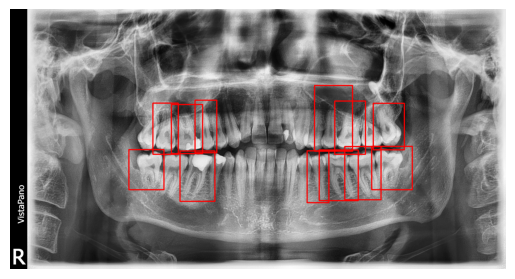

In [8]:
plot_image_with_boxes(image_dir= image_dir, bboxes= bboxes)

# view a panoramic xray with the segmentation coordinates 

In [9]:
segmentation_masks = get_seg_masks(image_dir= image_dir)

In [11]:
len(segmentation_masks)

12

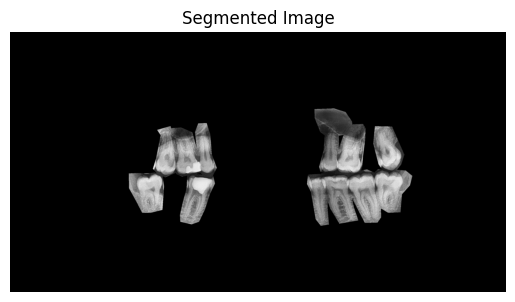

In [12]:
# Read original image
original_image = cv2.imread(image_dir)

# Create a blank mask
mask = np.zeros_like(original_image[:, :, 0])

# Overlay segmentation mask(s) onto blank mask
for mask_coordinates in segmentation_masks:
    mask_coordinates = np.array(mask_coordinates)
    mask_coordinates = mask_coordinates.reshape((-1, 1, 2))  # Reshape coordinates for fillPoly
    cv2.fillPoly(mask, [mask_coordinates], (255, 255, 255))  # Fill the polygon defined by the coordinates


# Overlay the mask on the original image
segmented_image = cv2.bitwise_and(original_image, original_image, mask=mask)

# Plot the segmented image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()

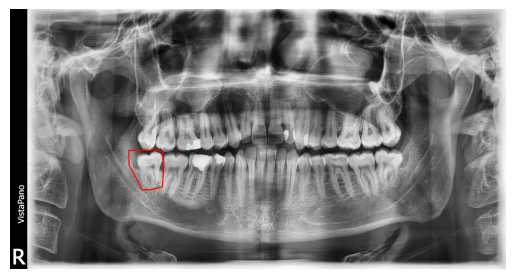

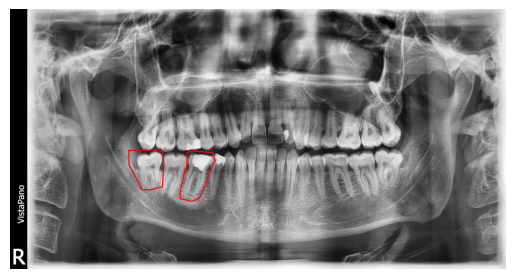

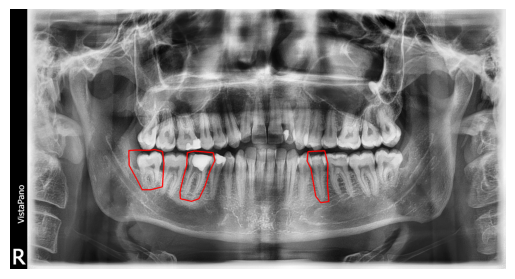

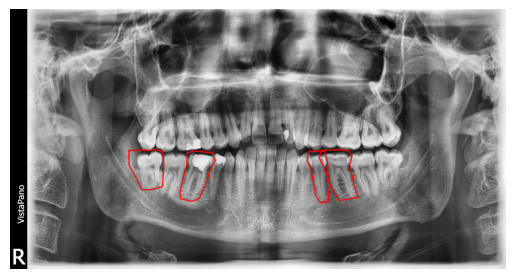

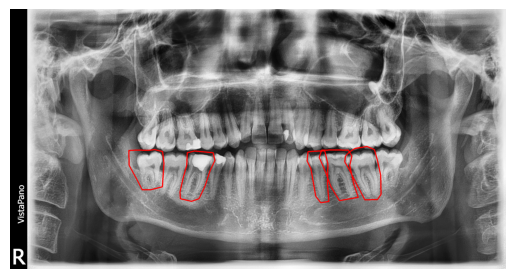

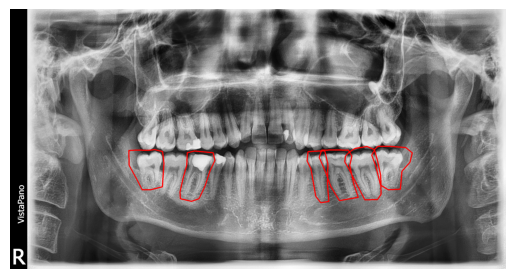

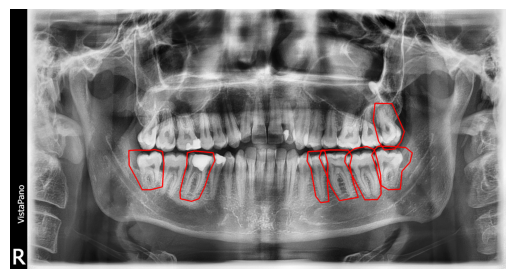

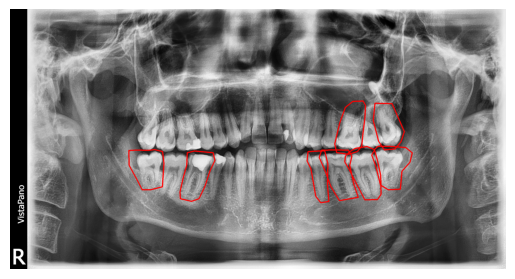

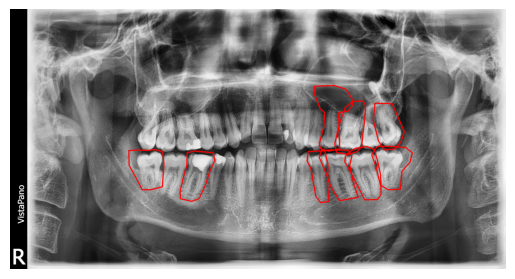

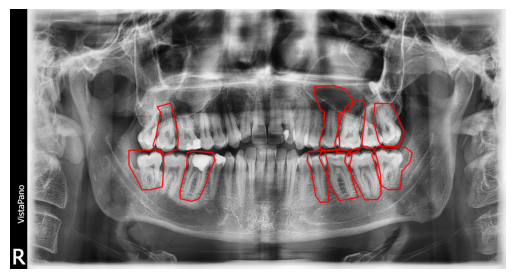

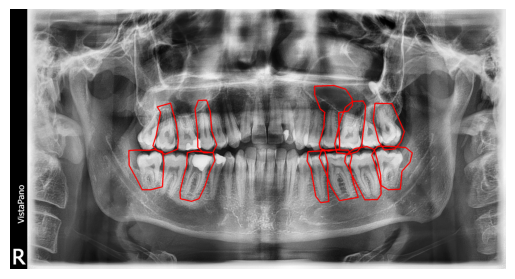

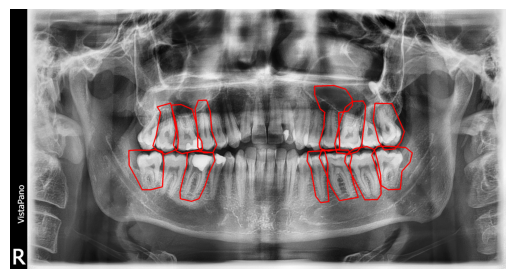

In [34]:
plot_image_with_seg(image_dir, segmentation_masks)